# HW6 DATASCI W261: Machine Learning at Scale 

* **Name:**  Megan Jasek
* **Email:**  meganjasek@ischool.berkeley.edu
* **Class Name:**  W261-2
* **Week Number:**  6
* **Date:**  6/25/16

## HW6.0
In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

Mathematical optimization is the process of choosing the best solution (based on some criteria) from a set of possible solutions.  This type of problem usually consists of finding the extremum(a) of a real function by systematically going through a set of input values and computing the output of the function.

An example of an optimization problem from industry is the cell placement problem for semiconductor integrated circuits.  The problem is to take the netlist (which consists of all cells that will be placed on a chip and their connectivity) and then create the optimal placement of the cells on the chip.  This work is usually performed by software that is programmed with an objective function.  The engineer designing the chip runs the program after they have created the netlist.  The program takes as inputs the netlist of all cells, the available area for the chip and the routing resources used to make connections.  Then it places the cells on the chips in a way that minimizes the area used and minimizes the route length used to make connections (thus mininimizing cell-to-cell delay and required power).  One constraint on the system is that the solution must be routable which means that all the cells that need to be connected are connected.  Another constraint could be the area available for cell placement.  It is possible to create a set of inputs that does not converge on a routable solution.  In this case, usually constraints need to be modified to get a working solution.

Yes, this is successful.  This type of software has been successfully deployed in the semiconductor field for decades.

## HW6.1
Optimization theory: 
For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion.

**First Order Conditions (FOC):**  
The 1st derivative of the function is 0 at maximum and minimum points of the function.  The zero points are the roots of the 1st derivative.
$$ f'(x=x^*) = 0,\ at\ maximum\  and\  minimum$$

**Second Order Conditions (SOC):**  
The 2nd derivative is the rate of change of the 1st derivative.  If the 2nd derivative is negative at the x value where the 1st derivative is 0, then that point is a local maximum.  If the 2nd derivative is positive then that point is a local minimum.

$$ f''(x=x^*) < 0,\ then\ maximum.$$
$$ f''(x=x^*) > 0,\ then\ minimum. $$

Also in python, plot the univartiate function $x^3 - 12x^2 - 6$ defined over the real domain -6 to +6.  Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.  
**Objective Function:** $f(x) = x^3 - 12x^2 - 6$  A candidate local maximum looks like (0,-6).  
**1st Derivative:** $f'(x) = 3x^2 - 24x$.  Looking at the first derivative, the FOC say that a local extremum will be when the 1st derivative = 0.  Solving this equation:
$$3x^2 - 24x = 0$$
$$x(x-8) = 0$$
$$x = 0\ or\ 8$$  
the roots for the 1st derivative are 0 and 8.  Using FOC the local extremum would occur at points (x=0, y=-6) and (x=8, y=-262) in the objective function.  
**2nd Derivative:** $f''(x) = 6x - 24$.  Looking at the second derivative, the SOC say that if the 2nd derivative is negative then the point is a local maximum.  In this case when x=0, the 2nd derivative has a value of -24 which is negative, so the local extremum of (0,-6) in the objective function is a local maximum.

For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?

**First Order Conditions (FOC):**  
The 1st derivative of the function is 0 at maximum and minimum points of the objective function.
$$ f'(x=x^*) = 0,\ at\ maximum\  and\  minimum$$


**Second Order Conditions (SOC):**  
A sufficient condition for an extreme point $x^* (i.e., f'(x^*) = 0)$ to be a minimum is to have a positive definite Hessian at x* (i.e., has positive (nonzero) eigenvalues).  

A Hessian matrix is a matrix of second-order partial derivatives of a multi-variate function. It describes the local curvature of the function.

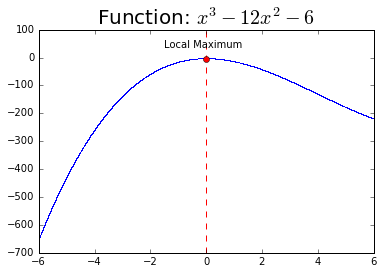

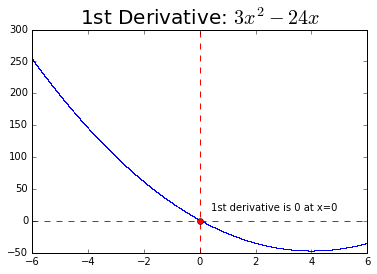

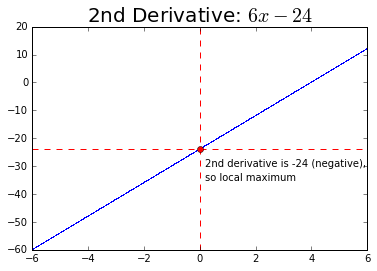

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
size = 10000

# plot the univartiate function X^3 -12x^2-6 defined over the real domain -6 to +6
x = np.linspace(-6, 6, size)
y = pow(x,3) - 12*pow(x,2) - 6
plt.axis([-6, 6, -700, 100])
plt.plot(x, y, ',')
plt.plot((0, 0), (-700, 100), 'r--')
plt.plot([0], [-6], 'ro')
plt.text(-1.5, 35, 'Local Maximum')
plt.title('Function: $x^3 - 12x^2 - 6$', fontsize=20)
plt.show()

# plot the 1st derivative of X^3 -12x^2-6 defined over the real domain -6 to +6
# 1st derivative: 3x^2 - 24x
y = 3*pow(x,2) - 24*x
plt.plot(x, y, ',')
plt.plot((-6, 6), (0, 0), 'r--')
plt.plot((0, 0), (-50, 300), 'r--')
plt.plot([0], [0], 'ro')
plt.text(.4, 15, '1st derivative is 0 at x=0')
plt.title('1st Derivative: $3x^2 - 24x$', fontsize=20)
plt.show()

# plot the 2nd derivative of X^3 -12x^2-6 defined over the real domain -6 to +6
# 2nd derivative: 6x - 24
y = 6*x - 24
plt.plot(x, y, ',')
plt.plot((-6, 6), (-24, -24), 'r--')
plt.plot((0, 0), (-60, 20), 'r--')
plt.plot([0], [-24], 'ro')
plt.text(.2, -30, '2nd derivative is -24 (negative),')
plt.text(.2, -35, 'so local maximum')
plt.title('2nd Derivative: $6x - 24$', fontsize=20)
plt.show()

## HW6.2
Taking x=1 as the first approximation(xt1) of a root of X^3 + 2x -4 = 0, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)  

**ANSWER:**  
**Newton-Raphson formula:**  $x^{i+1}=x^{i}−f′(x^{i})/f′′(x^{i})$  
**1st derivative:** $f'(x)$:  $x^3 + 2x - 4$  
**2nd derivative:** $f''(x)$:  $3x^2 + 2$  
Using the above formulas:  
$$xt2 = 1 - f′(1)/f′′(1)$$  
$$= 1 - (-1)/(5)$$  
$$= 1 + 1/5$$  
$$xt2 = 1.2$$  

## HW6.3
What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

**ANSWER:**  
An optimization problem is convex if it is trying to optimize a convex function.  A function is convex if it is differentiable (i.e. it can be differentiated at each point for which it is defined) and its domain is convex and the equation

$$f(y) >= f(x) + \triangledown f(y)^{T}(y-x)$$

holds for all $x, y \in$ domain f.

**First Order Conditions (FOC) in convex optimization:**  
The 1st derivative of the objective function is 0 at the global minimum of the objective function.
$$ f'(x=x^*) = 0,\ at\ global\ minimum$$

**Second Order Conditions (SOC) in convex optimization:**  
No second order conditions are required in convex optimization.  

**Are both conditions necessary?**  
No, both conditions are not necessary to determine the global extremum.  We do not need to look at the SOC because there is only one global extremum and it is a global minimum.

Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing BLANK functions over BLANK sets. The BLANK property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

**ANSWER:**  Convex minimization, a subfield of optimization, studies the problem of minimizing CONVEX functions over CONVEX sets. The CONVEX property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

## HW6.4
The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

$$\frac{1}{2} \sum_{i=1}^n (weight_i (W X_i - y_i)^2)$$

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

$$objective\ function\ f = \frac{1}{2}  \sum_{i=1}^n (weight_i  (W X_i - y_i)^2)$$  

Multiply out the squared term:  
$$ f = \frac{1}{2} \sum_{i=1}^n weight_iW^2X_i^2 - 2weight_iWX_iy_i + weight_iy_i^2$$

Take the derivative (gradient) with respect to $W$:  
$$ \frac{\delta f}{\delta W} = \frac{1}{2} \sum_{i=1}^n 2weight_iWX_i^2 - 2weight_iX_iy_i$$  

Pull out the common terms of the equation:  
$$\frac{\delta f}{\delta W} = \frac{1}{2} \sum_{i=1}^n 2weight_iX_i(X_iW - y_i)$$  

Pull out the contant term 2 out of the summation:  
$$gradient\ \frac{\delta f}{\delta W} = \sum_{i=1}^n weight_iX_i(X_iW - y_i) \ \ \ \ \ \ (Equation\ 1)$$

## HW6.5
Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

**ANSWER:**  
The plot of the models can be seen below in the section called:  PLOT SCIKIT-LEARN AND MAPREDUCE RESULTS

The equation produced by the MapReduce algorithm is as follows:

$$ Y = -3.95805134 + 1.00172672X$$

The equation produced by the Scikit-learn algorithm is as follows:

$$ Y = -4.001702 + 0.997654X$$

The equations and the lines in the plot below are very similar.  They both have an intercept of about -4.0 and a coefficient of about 1.0.  This indicates that the MapReduce algorithm is doing a good job estimating the linear regression model from the original data (which was generated from the equation $Y = -4 + 1x$).  The original data are also plotted in grey in the graph.  The lines in the graph look to make a good estimate of the data as they go straight through the center of it.

### Data Generation

Data Information:
+ Size: 1,000,000 points
+ True model: y = 1.0 * x - 4
+ Noise：Normal Distributed mean = 0, var = 0.5

In [12]:
import numpy as np
# Set a random seed, so the results stay the same for all randomizations
np.random.seed(714)

In [13]:
# Create 1,000,000 data points and save them to a file
%matplotlib inline
import numpy as np
import pylab 
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [14]:
# Check to see if the correct number of data points were generated and saved
!wc -l LinearRegression.csv
!head LinearRegression.csv

1000000 LinearRegression.csv
-4.066165293957055837e+00,1.365143517727265277e-01
-6.501483835103874398e+00,-1.292867299909647549e+00
-7.042209007375656249e+00,-2.955046811137194140e+00
-4.379238548231782602e+00,-2.841698389698397165e-01
-6.210095268908060184e+00,-2.809423473040127739e+00
-2.066523974202159053e+00,1.343607053411203900e+00
-4.443311541122631603e+00,-4.873762176034883709e-01
-2.236224561944961664e+00,1.665569563902894679e+00
-7.988241499467847007e+00,-3.305408810947675136e+00
-7.868910894066027062e+00,-3.866826421539980352e+00


### Data Visualization

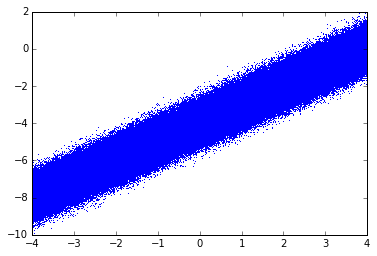

In [15]:
# Plot the data points
pylab.plot(x, y,',')
pylab.show()

**Linear regression via gradient descent**  
**Objective Function**  
Find the minimum of this objective function.  
$$ f = \frac{1}{2} \sum_{i=1}^n weight_i (W X_i - y_i)^2$$  
where n is the number of data points in the data set.

**Algorithm**  
1. Driver process initializes weight vector (W)
2. While not converged:  
a. Call MRJob to calculate gradient  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. Read current weight vector (mapper_init method)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. Calculate partial gradient (mapper and mapper_final methods) using Equation 1 below.   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. Calculate full gradient (reducer method)  
b. Update weight vector  
c. Check for convergence  
3. End while

**Gradient Function**  
Set the gradient function to 0 to final the minimum.
$$gradient\ \frac{\delta f}{\delta W} = \sum_{i=1}^n weight_iX_i(X_iW - y_i) \ \ \ \ \ \ (Equation\ 1)$$
where n is the number of data points in the data set.

In [4]:
%%writefile BatchGDLinearRegression.py
from mrjob.job import MRJob
from mrjob.step import MRStep

# This class calculates the gradient for a set of data points  
class MRBatchGDLinearRegression(MRJob):
    # Initialize a variable to declare if weighted OLS will be used or not.
    # NOT Weighted = 0, Weighted = 1
    weighted = 0
    
    # Initialize variables used in the calculation
    def mapper_init(self):
        # Set the weighted variable
        self.weighted = self.options.weighted
        # Read weights file
        self.weights = []
        with open('weights.txt', 'r') as f:
            for line in f.readlines():
                vals = line.strip().split(',')
                for v in vals:
                    self.weights.append(float(v))
        # Initialze gradient list
        self.p_grad = [0]*len(self.weights)
        self.p_count = 0
    
    # Calculate partial gradient for each data point 
    def mapper(self, _, line):
        point = line.strip().split(',')
        point[0] = float(point[0])
        point[1] = float(point[1])
        # set a weight for each x equal to abs(1/x)
        wgt_xi = 1.0
        if self.weighted == 1:
            wgt_xi = abs(1.0/point[1])
        # calculate the current predicted y value
        cur_y = self.weights[0]+self.weights[1]*point[1]
        # Update parial gradient using Equation 1 above
        # Multiply the 2nd value by the wgt_xi for weighted OLS
        self.p_grad[0] += cur_y-point[0]
        self.p_grad[1] += (cur_y-point[0])*point[1]*wgt_xi
        self.p_count += 1
    
    # Output partial gradient and partial count
    def mapper_final(self):
        yield None, (self.p_grad, self.p_count)
        
    # Sum partial gradients, output total gradient 
    def reducer(self, _, data): 
        total_grad = [0]*2
        total_count = 0
        for p_grad, p_count in data:
            total_count += p_count
            total_grad[0] += p_grad[0]
            total_grad[1] += p_grad[1]
        total_grad[0] /= total_count
        total_grad[1] /= total_count
        yield None, total_grad
    
    def steps(self):
        return [MRStep(mapper_init=self.mapper_init,
                       mapper=self.mapper,
                       mapper_final=self.mapper_final,
                       reducer=self.reducer)] 

    # Configure a new command line option to enable the job to accept the value
    # of the weighted variable
    def configure_options(self):
        super(MRBatchGDLinearRegression, self).configure_options()
        self.add_passthrough_option('--weighted', type='int', default=0)
    
if __name__ == '__main__':
    MRBatchGDLinearRegression.run()

Overwriting BatchGDLinearRegression.py


In [1]:
import numpy as np
import BatchGDLinearRegression
reload(BatchGDLinearRegression)

# set learning rate and stopping criteria rates
learning_rate = 0.05
stop_criteria = 0.000005
# Variable to control whether weighted OLS is used or not
WEIGHTED_OLS = 1

# Generate random values as inital weights
weights = np.array([np.random.uniform(-3,3), np.random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = BatchGDLinearRegression.MRBatchGDLinearRegression(args=['LinearRegression.csv','--file=weights.txt',
                                                                                       '--weighted', str(WEIGHTED_OLS)])
i = 0
while(1):
    # Print the weights every 10th iteration
    if i%10 == 0:
        print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key, value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights - learning_rate * np.array(value)
    i += 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2) < stop_criteria):
        break
        
print "\nFinal weights"
print weights

# Write the final weights to file 
if WEIGHTED_OLS == 1:
    fname = 'weights_weighted.txt'
else:
    fname = 'weights_non-weighted.txt'
with open(fname, 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

iteration =0  weights = [-2.68776154  2.79398463]
iteration =10  weights = [-3.214299    1.62560911]
iteration =20  weights = [-3.5296436   1.21826625]
iteration =30  weights = [-3.71848246  1.07623954]
iteration =40  weights = [-3.83155786  1.02671331]
iteration =50  weights = [-3.89926397  1.0094392 ]
iteration =60  weights = [-3.93980341  1.00341196]

Final weights
[-3.95805134  1.00172672]


In [2]:
!cat weights_non-weighted.txt
!echo ''
!cat weights_weighted.txt

-3.95890963794,1.00006573562
-3.95805134127,1.0017267235

In [ ]:
########### RUN SCIKIT-LEARN LINEAR REGRESSION ##########
import numpy as np
from sklearn.linear_model import LinearRegression

fname = 'LinearRegression.csv'
num_samples = 10000
X = []
Y = []
# Sample 1% of the 1,000,000 points generated without replacement
with open(fname, 'r') as f:
    sample_pts = [s.strip() for s in np.random.choice(f.readlines(),num_samples,replace=False)]

# Convert points to X and Y arrays for model training
for pt in sample_pts:
    y,x = pt.split(',')
    X.append(float(x))
    Y.append(float(y))

# Convert X to a numpy array for the LinearRegression function
X = np.array((X))
X = X.reshape((num_samples,1))
#print X.shape
# Create a linear regression model
lm = LinearRegression()
# Fit the model to the X and Y data points
lm.fit(X, Y)
print('Scikit-learn Intercept: %f and Coefficient: %f' % (lm.intercept_, lm.coef_))

In [2]:
# read in original dataset
x_data = []
y_data = []
with open('LinearRegression.csv', 'r') as f:
    for line in f.readlines():
        data = line.strip().split(',')
        y_data.append(float(data[0]))
        x_data.append(float(data[1]))

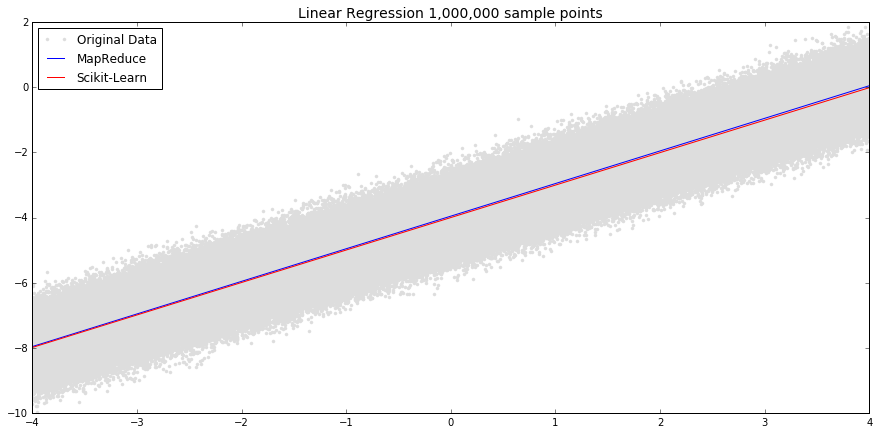

In [3]:
############ PLOT SCIKIT-LEARN AND MAPREDUCE RESULTS ###########
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Final weights MapReduce:  -3.95805134, 1.00172672
# Scikit-learn Intercept: -4.001702 and Coefficient: 0.997654

# Create evenly spaced x data points to plot between -4 and 4
x = np.linspace(-4, 4, 1000)
# Create the lines formed from the output of the MapReduce linear regression
y_mr_w = -3.95805134 + 1.00172672*x
# Create the lines formed from the output of the MapReduce linear regression
y_skl = -4.001702 + 0.997654*x

plt.figure(figsize=(15, 7))
# Plot the original data
plt.plot(x_data, y_data, '.', label='Original Data', color='#dddddd')
# Plot the regression lines
plt.plot(x, y_mr_w, label='MapReduce')
plt.plot(x, y_skl, label='Scikit-Learn', color='red')
# Add a title and legend
plt.title('Linear Regression 1,000,000 sample points', fontsize=14)
plt.legend(loc=2)
# Show the plot
plt.show()

## HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:  
-- Add in equations into the notebook (not images of equations)  
-- Number the equations  
-- Make sure the equation notation matches the code and the code and comments refer to the equations numbers  
-- Comment the code  
-- Rename/Reorganize the code to make it more readable  
-- Rerun the examples similar graphics (or possibly better graphics)  

This is a map-reduce version of expectation maximization algo for a mixture of Gaussians model. There are two mrJob MR packages, mr_GMixEmIterate and mr_GMixEmInitialize.  The driver calls the mrJob packages and manages the iteration.

## E Step: Given priors, mean vector and covariance matrix, calculate the probability that each data point belongs to a class  

\begin{equation}
p(\omega_k\mid x^{(i)},\theta) = \frac{\pi_kN(x^{(i)}\mid\mu_k,\sum_k)}{\sum_{j=1}^{K}\pi_jN(x^{(i)}\mid\mu_j, \sum_j)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1)
\end{equation}


## M Step: Given probabilities, update priors, mean and covariance  
$$\hat{\mu}_k = \frac{1}{n_k} \sum_{i=1}^n p(\omega_k \mid x^{(i)},\theta)x^{(i)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2)$$

$$\hat{\sum}_k = \frac{1}{n_k} \sum_{i=1}^n p(\omega_k \mid x^{(i)},\theta)(x^{(i)}-\hat{\mu}_k)(x^{(i)}-\hat{\mu}_k)^T \ \ \ \ \ \ \ \ \ \ \ \ (3)$$

$$\hat{\pi}_k = \frac{n_k}{n}, where\ n_k = \sum_{i=1}^n p(\omega_k \mid x^{(i)},\theta) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (4)$$

# Data Generation

In [2]:
import numpy as np
import json
size1 = size2 = size3 = 1000
# The multivariate normal distribution is a generalization of the one-dimensional normal
# distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix.
# np.random.multivariate_normal(mean, cov_matrix, size)
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
# Write the data to the data.txt file
with open("data.txt", "w") as f:
    for row in data.tolist():
        json.dump(row, f)
        f.write("\n")

In [3]:
# Check to make sure the data was created correctly
!wc -l data.txt
!head data.txt

3000 data.txt
[1.8919599348442773, 4.345081928386391]
[6.852167369415668, 7.122165816100395]
[3.5237249520081844, -1.1572102250919565]
[3.0550836615254324, 0.07883970979442498]
[5.020576689575394, 5.240714772192525]
[1.2664570950003926, 4.545348877299345]
[-1.006369087376323, 4.180835665769995]
[5.082073463766115, 0.9169055320496305]
[5.943452818492088, 5.221523338041036]
[4.987840359591588, -0.45870324755015807]


# Data Visualization

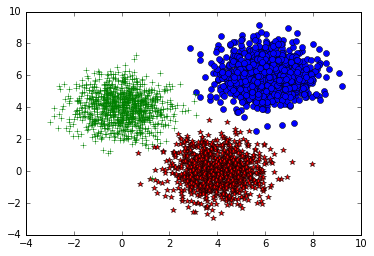

In [4]:
%matplotlib inline
import pylab 
# Plot samples1 with red stars
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
# Plot samples2 with blue circles
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
# Plot samples3 with green pluses
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
# Display the graphs
pylab.show()

# Initialization
Here suppose we know there are 3 components

In [5]:
%%writefile mr_GMixEmInitialize.py
from mrjob.job import MRJob
from mrjob.step import MRStep

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg, full
from random import sample
import json
import os
from math import pi, sqrt, exp, pow

class MrGMixEmInit(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGMixEmInit, self).__init__(*args, **kwargs)
        self.numMappers = 1     #number of mappers
        self.count = 0
        
    # Add 2 command line options
    # 1. '--k' of type int and default 3
    # 2. '--pathName of type str and default ""
    def configure_options(self):
        super(MrGMixEmInit, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt and debug.txt is stored')
        
    def mapper(self, key, xjIn):
        #something simple to grab random starting point
        #collect the first 2k
        if self.count <= 2*self.options.k:
            self.count += 1
            yield (1,xjIn)        
        
    def reducer(self, key, xjIn):        
        #accumulate data points mapped to 0 from 1st mapper and pull out k of them as starting point
        cent = []
        for xj in xjIn:
            x = json.loads(xj)
            cent.append(x)
            #yield 1, xj
        # Return a self.options.k length of unique elements chosen from range(len(cent)).
        # Used for random sampling without replacement.
        index = sample(range(len(cent)), self.options.k)
        cent2 = []
        for i in index:
            cent2.append(cent[i])
        
        #use the covariance of the selected centers as the starting guess for covariances
        #first, calculate mean of centers
        mean = array(cent2[0])
        for i in range(1,self.options.k):
            mean = mean + array(cent2[i])
        mean = mean/float(self.options.k)
       
        #then accumulate the deviations
        # Create a 2x2 matrix of zeros
        cov = zeros((len(mean),len(mean)),dtype=float)
        # Set the diagonals to the variance
        for x in cent2:
            xmm = array(x) - mean
            for i in range(len(mean)):
                cov[i,i] = cov[i,i] + xmm[i]*xmm[i]
        
        # divide by k
        cov = cov/(float(self.options.k))
        # compute the inverse of matrix cov
        covInv = linalg.inv(cov)
        
        cov_1 = [covInv.tolist()]*self.options.k
        
        # write the results to the debug.txt file
        jDebug = json.dumps([cent2,mean.tolist(),cov.tolist(),covInv.tolist(),cov_1])    
        debugPath = self.options.pathName + 'debug.txt'
        fileOut = open(debugPath,'w')
        fileOut.write(jDebug)
        fileOut.close()
        
        #also need a starting guess at the phi's - prior probabilities
        #initialize them all with the same number - 1/k - equally probably for each cluster
        phi = zeros(self.options.k,dtype=float)
        for i in range(self.options.k):
            phi[i] = 1.0/float(self.options.k)
        
        #form output object
        outputList = [phi.tolist(), cent2, cov_1]
            
        jsonOut  = json.dumps(outputList)
        print jsonOut
        yield None, jsonOut
        
    def steps(self):
        return [MRStep(mapper=self.mapper,
                       reducer=self.reducer)] 

if __name__ == '__main__':
    MrGMixEmInit.run()

Overwriting mr_GMixEmInitialize.py


# Iteration

**Mapper** – each mapper needs k vector means and covariance matrices to make probability calculations.  Can also accumulate partial sum (sum restricted to the mapper's input) of quantities required for update.  Then it emits partial sum as single output from combiner.  
    Emit (dummy_key, partial_sum_for_all_k's)

**Reducer** –the iterator pulls in the partial sum for all k's from all the mappers and combines in a single reducer.  In this case the reducer emits a single (json'd python object) with the new means and covariances.

In [6]:
%%writefile mr_GMixEmIterate.py
from mrjob.job import MRJob
from mrjob.step import MRStep

from math import sqrt, exp, pow,pi
from numpy import zeros, shape, random, array, zeros_like, dot, linalg
import json

def gauss(x, mu, P_1):
    xtemp = x - mu
    n = len(x)
    p = exp(- 0.5*dot(xtemp,dot(P_1,xtemp)))
    detP = 1/linalg.det(P_1)
    p = p/(pow(2.0*pi,n/2.0)*sqrt(detP))
    return p

class MrGMixEm(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGMixEm, self).__init__(*args, **kwargs)
        
        fullPath = self.options.pathName + 'intermediateResults.txt'
        with open(fullPath) as fileIn:
            inputJson = fileIn.read()
        inputList = json.loads(inputJson)
        temp = inputList[0]        
        self.phi = array(temp)           #prior class probabilities
        temp = inputList[1]
        self.means = array(temp)         #current means list
        temp = inputList[2]
        self.cov_1 = array(temp)         #inverse covariance matrices for w, calc.
        #accumulate partial sums                               
        #sum of weights - by cluster
        self.new_phi = zeros_like(self.phi)        #partial weighted sum of weights
        self.new_means = zeros_like(self.means)
        self.new_cov = zeros_like(self.cov_1)
        
        self.numMappers = 1             #number of mappers
        self.count = 0                  #passes through mapper
                                                 
    def configure_options(self):
        super(MrGMixEm, self).configure_options()

        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt is stored')
        
    def mapper(self, key, val):
        #accumulate partial sums for each mapper
        xList = json.loads(val)
        x = array(xList)
        wtVect = zeros_like(self.phi)
        for i in range(self.options.k):
            wtVect[i] = self.phi[i]*gauss(x,self.means[i],self.cov_1[i])
        wtSum = sum(wtVect)
        wtVect = wtVect/wtSum
        #accumulate to update est of probability densities.
        #increment count
        self.count += 1
        #accumulate weights for phi est
        self.new_phi = self.new_phi + wtVect
        for i in range(self.options.k):
            #accumulate weighted x's for mean calc
            self.new_means[i] = self.new_means[i] + wtVect[i]*x
            #accumulate weighted squares for cov estimate
            xmm = x - self.means[i]
            covInc = zeros_like(self.new_cov[i])
            
            for l in range(len(xmm)):
                for m in range(len(xmm)):
                    covInc[l][m] = xmm[l]*xmm[m]
            self.new_cov[i] = self.new_cov[i] + wtVect[i]*covInc     
        #dummy yield - real output passes to mapper_final in self

        
    def mapper_final(self):
        out = [self.count, (self.new_phi).tolist(), (self.new_means).tolist(), (self.new_cov).tolist()]
        jOut = json.dumps(out)        
        yield 1,jOut
    
    def reducer(self, key, xs):
        #accumulate partial sums
        first = True        
        #accumulate partial sums
        #xs is a list of paritial stats, including count, phi, mean, and covariance. 
        #Each stats is k-length array, storing info for k components
        for val in xs:
            if first:
                temp = json.loads(val)
                #totCount, totPhi, totMeans, and totCov are all arrays
                totCount = temp[0]
                totPhi = array(temp[1])
                totMeans = array(temp[2])
                totCov = array(temp[3])                
                first = False
            else:
                temp = json.loads(val)
                #cumulative sum of four arrays
                totCount = totCount + temp[0]
                totPhi = totPhi + array(temp[1])
                totMeans = totMeans + array(temp[2])
                totCov = totCov + array(temp[3])
        #finish calculation of new probability parameters. array divided by array
        newPhi = totPhi/totCount
        #initialize these to something handy to get the right size arrays
        newMeans = totMeans
        newCov_1 = totCov
        for i in range(self.options.k):
            newMeans[i,:] = totMeans[i,:]/totPhi[i]
            tempCov = totCov[i,:,:]/totPhi[i]
            #almost done.  just need to invert the cov matrix.  invert here to save doing a matrix inversion
            #with every input data point.
            newCov_1[i,:,:] = linalg.inv(tempCov)
        
        outputList = [newPhi.tolist(), newMeans.tolist(), newCov_1.tolist()]
        jsonOut = json.dumps(outputList)
        yield None, jsonOut
        
    def steps(self):
        return [MRStep(mapper=self.mapper,mapper_final=self.mapper_final,
                       reducer=self.reducer)] 

if __name__ == '__main__':
    MrGMixEm.run()

Overwriting mr_GMixEmIterate.py


# Driver

[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [[-0.9294309299132464, 4.919534828709251], [5.020576689575394, 5.240714772192525], [3.965950370008545, 0.07219092483036718]], [[[0.14881054388631512, 0.0], [0.0, 0.17887829627864815]], [[0.14881054388631512, 0.0], [0.0, 0.17887829627864815]], [[0.14881054388631512, 0.0], [0.0, 0.17887829627864815]]]]
Iteration0
[[-0.9294309299132464, 4.919534828709251], [5.020576689575394, 5.240714772192525], [3.965950370008545, 0.07219092483036718]]
null	"[[0.27355580250400324, 0.3851476570556403, 0.3412965404403564], [[0.18594110159317553, 4.046736665024734], [5.222645108463273, 5.371246120467213], [3.731274513825263, 0.499948500060355]], [[[0.2960079755530262, 0.11827579743817632], [0.11827579743817632, 0.48410856726456347]], [[0.28553537023038683, -0.13836065935142172], [-0.13836065935142172, 0.3692257315489844]], [[0.45018183067394885, 0.09541827082809236], [0.09541827082809236, 0.33716646329935646]]]]"

[[-0.9294309299132464, 4.919534

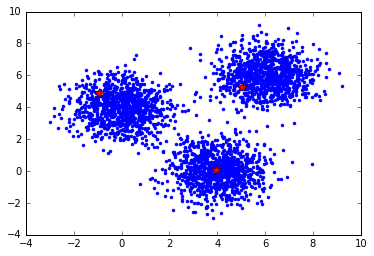

Iteration1
[[0.18594110159317553, 4.046736665024734], [5.222645108463273, 5.371246120467213], [3.731274513825263, 0.499948500060355]]
null	"[[0.30222454380741276, 0.3630978167394416, 0.3346776394531459], [[0.002656400584617423, 3.9721775100273864], [5.6373203753085575, 5.766004995183417], [3.8488508809222055, 0.15611585911377757]], [[[0.747747378161992, 0.16070672999980923], [0.16070672999980926, 0.8411863120060215]], [[0.43782771760011036, -0.23350515521754558], [-0.23350515521754558, 0.6462507531037578]], [[0.7448684382431043, 0.22935194793262378], [0.22935194793262384, 0.6730618129628018]]]]"

[[0.18594110159317553, 4.046736665024734], [5.222645108463273, 5.371246120467213], [3.731274513825263, 0.499948500060355]]


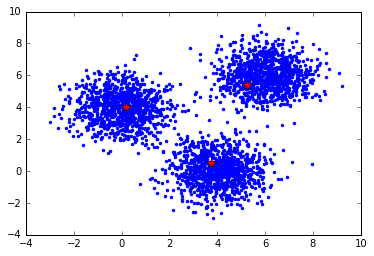

Iteration2
[[0.002656400584617423, 3.9721775100273864], [5.6373203753085575, 5.766004995183417], [3.8488508809222055, 0.15611585911377757]]
null	"[[0.32200881637921286, 0.343144374313011, 0.3348468093077753], [[-0.0472978291330477, 4.005558243234337], [5.908132626984459, 5.947640731042726], [3.953191982006423, 0.046699928416537875]], [[[1.0578248850585816, 0.05917108561818586], [0.05917108561818586, 0.9815059092660826]], [[0.6994572872128929, -0.15533874956131585], [-0.15533874956131585, 0.8863706990862084]], [[0.9101000644754673, 0.10506612327916792], [0.10506612327916792, 0.9557458692040095]]]]"

[[0.002656400584617423, 3.9721775100273864], [5.6373203753085575, 5.766004995183417], [3.8488508809222055, 0.15611585911377757]]


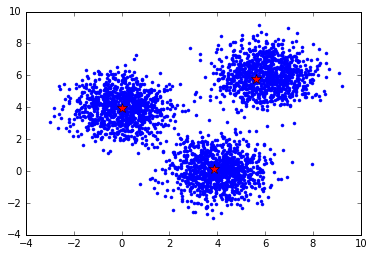

Iteration3
[[-0.0472978291330477, 4.005558243234337], [5.908132626984459, 5.947640731042726], [3.953191982006423, 0.046699928416537875]]
null	"[[0.33064379683335443, 0.33550324262543385, 0.3338529605412114], [[-0.012934257221315425, 4.000410436455462], [5.994416849269338, 5.999284396647584], [3.9806632734616363, 0.03256398874773088]], [[[1.027101963820416, 0.048026997673763686], [0.048026997673763686, 0.9830898578927595]], [[0.9294393349199306, -0.038599917921690236], [-0.038599917921690236, 0.9867552005045133]], [[0.9733884744699984, 0.03623460949544175], [0.03623460949544175, 1.0032064191383583]]]]"

[[-0.0472978291330477, 4.005558243234337], [5.908132626984459, 5.947640731042726], [3.953191982006423, 0.046699928416537875]]


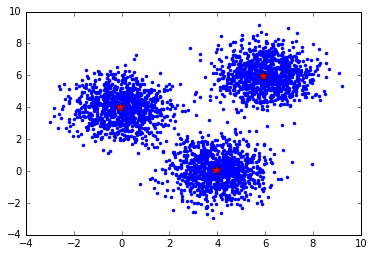

Iteration4
[[-0.012934257221315425, 4.000410436455462], [5.994416849269338, 5.999284396647584], [3.9806632734616363, 0.03256398874773088]]
null	"[[0.3329818334910542, 0.3335995502854737, 0.33341861622347224], [[0.0023908193254614826, 3.996289515380675], [6.01055964095354, 6.011113486679589], [3.9887088486515108, 0.031087893090412416]], [[[0.9973859657339075, 0.0508479566231976], [0.0508479566231976, 0.9757333629772493]], [[0.9772071962527098, -0.009090428458416342], [-0.009090428458416342, 1.012328341793571]], [[0.9872455331780623, 0.02027101680325249], [0.020271016803252495, 1.0018203757734292]]]]"

[[-0.012934257221315425, 4.000410436455462], [5.994416849269338, 5.999284396647584], [3.9806632734616363, 0.03256398874773088]]


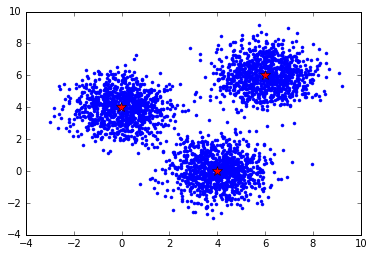

Iteration5
[[0.0023908193254614826, 3.996289515380675], [6.01055964095354, 6.011113486679589], [3.9887088486515108, 0.031087893090412416]]
null	"[[0.3335177138062689, 0.33324984051740886, 0.3332324456763225], [[0.006236378489821619, 3.994795621165467], [6.013043835093822, 6.013241164809629], [3.9909080070509417, 0.030354446064961967]], [[[0.9893024232820256, 0.05239895993759084], [0.05239895993759083, 0.9730902357209809]], [[0.9831550939135467, -0.004792247934470901], [-0.004792247934470901, 1.0167814080261584]], [[0.9903452641046405, 0.016083539629391047], [0.01608353962939105, 1.001838647956021]]]]"

[[0.0023908193254614826, 3.996289515380675], [6.01055964095354, 6.011113486679589], [3.9887088486515108, 0.031087893090412416]]


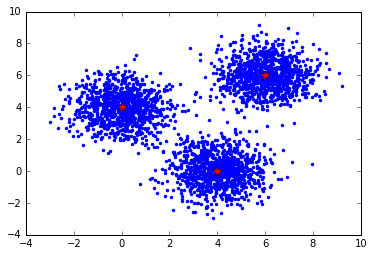

Iteration6
[[0.006236378489821619, 3.994795621165467], [6.013043835093822, 6.013241164809629], [3.9909080070509417, 0.030354446064961967]]


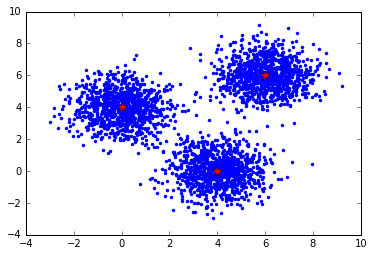

In [7]:
%reload_ext autoreload
%autoreload 2
import json
import os
import pylab 
from math import sqrt
import mr_GMixEmInitialize
import mr_GMixEmIterate
reload(mr_GMixEmInitialize)
reload(mr_GMixEmIterate)

def plot_iteration(means):
    # Plot the samples 
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

def dist(x,y):
    #euclidean distance between two lists    
    sum = 0.0
    for i in range(len(x)):
        temp = x[i] - y[i]
        sum += temp * temp
    return sqrt(sum)

#first run the initializer to get starting centroids
filePath = 'data.txt'
# --k and --pathName are optional parameters
mrJob = mr_GMixEmInitialize.MrGMixEmInit(args=[filePath])
with mrJob.make_runner() as runner:
    runner.run()
    # stream_output and print each line of the output
    for line in runner.stream_output():
        key,value =  mrJob.parse_output_line(line)
        jsonOut = value
        #print(line)
        
#print jsonOut
with open('intermediateResults.txt','w') as fileOut:
    fileOut.write(jsonOut)

#pull out the centroid values to compare with values after one iteration
emPath = "intermediateResults.txt"
paramJson = jsonOut

delta = 10
iter_num = 0
#Begin iteration on change in centroids
while delta > 0.02:
#while(False):
    print "Iteration" + str(iter_num)
    iter_num = iter_num + 1
    #parse old centroid values
    oldParam = json.loads(paramJson)
    #run one iteration
    oldMeans = oldParam[1]
    print oldMeans
    mrJob2 = mr_GMixEmIterate.MrGMixEm(args=[filePath, '--file=intermediateResults.txt'])
    with mrJob2.make_runner() as runner:
        runner.run()
        # stream_output and print each line of the output
        for line in runner.stream_output():
            key,value =  mrJob2.parse_output_line(line)
            jsonOut = value
            print(line)
    
    with open('intermediateResults.txt','w') as fileOut:
        fileOut.write(jsonOut)

    #compare new centroids to old ones
    with open(emPath) as fileIn:
        paramJson = fileIn.read()
    newParam = json.loads(paramJson)
    #newParam = json.loads(jsonOut)

    k_means = len(newParam[1])
    newMeans = newParam[1]

    delta = 0.0
    for i in range(k_means):
        delta += dist(newMeans[i],oldMeans[i])

    print oldMeans
    plot_iteration(oldMeans)
    
print "Iteration" + str(iter_num)
print newMeans
plot_iteration(newMeans)

In [1]:
%%writefile HW6_systems_test.txt
1	hot chocolate cocoa beans
2	cocoa ghana africa 
3	beans harvest ghana 
4	cocoa butter 
5	butter truffles 
6	sweet chocolate
7	sweet sugar
8	sugar cane brazil
9	sweet sugar beet
10	sweet cake icing
11	cake black forest

Writing HW6_systems_test.txt


$$P(d \mid \omega_k;\Theta) = (\prod\limits_{t_m \in d} q_{mk} )(\prod\limits_{t_m \notin d} (1 - q_{mk}) )$$